In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("jobs.csv")
print(data.head())

   Unnamed: 0                    Job Salary Job Experience Required  \
0           0   Not Disclosed by Recruiter               5 - 10 yrs   
1           1   Not Disclosed by Recruiter                2 - 5 yrs   
2           2   Not Disclosed by Recruiter                0 - 1 yrs   
3           3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4           4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawareho

In [5]:
#The dataset has an unnamed column. Let’s remove it and move further:

data = data.drop("Unnamed: 0",axis=1)


In [6]:
#Now let’s have a look if the dataset contains any null values or not:

data.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

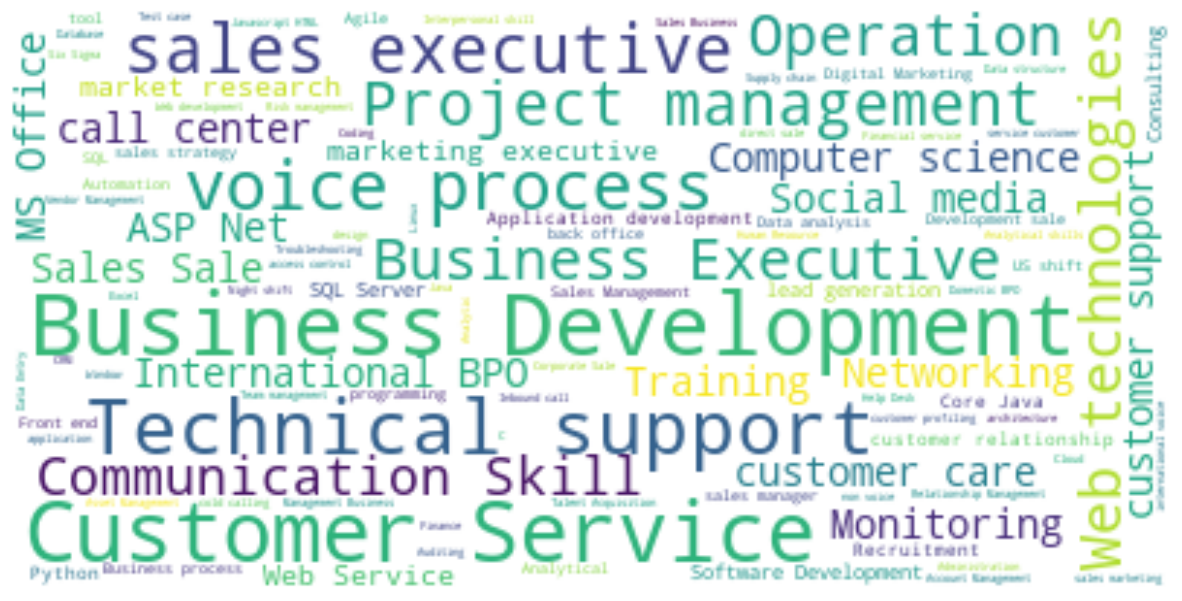

In [7]:
#As the dataset doesn’t have any null values, let’s move further by exploring the skills mentioned in the Key Skills column:

text = " ".join(i for i in data["Key Skills"])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

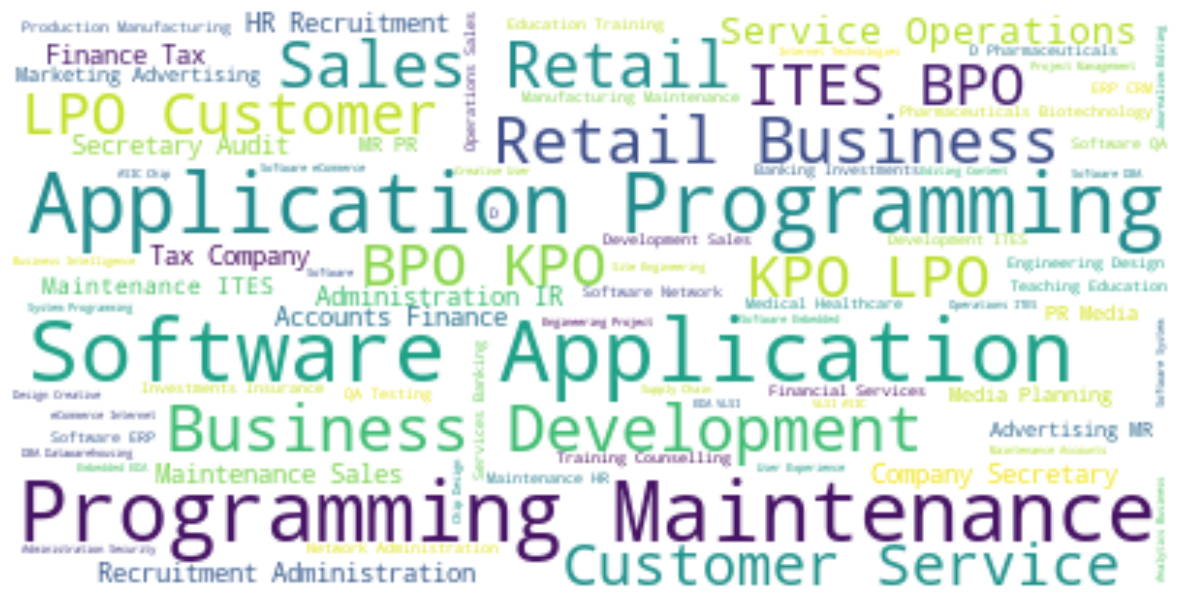

In [8]:
#Now let’s have a look at the functional areas mentioned in the dataset:

text = " ".join(i for i in data["Functional Area"])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

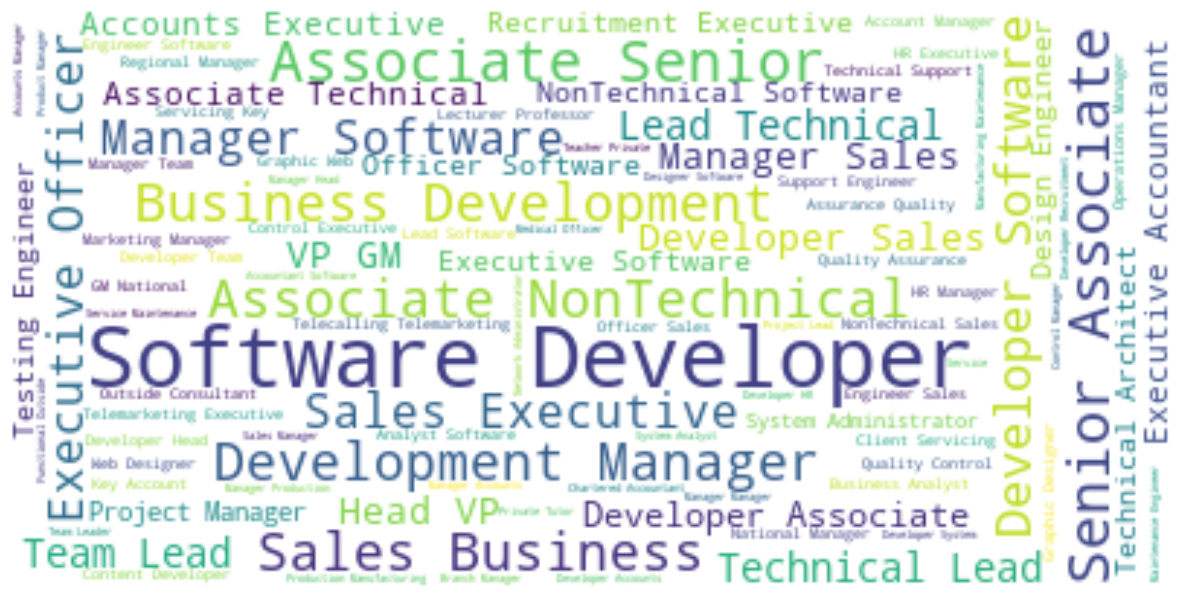

In [9]:
#Now let’s have a look at the job titles mentioned in the dataset:



text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Creating a Content-Based Recommendation System

Now let’s move forward by creating a job recommendation system. The Key Skills column in the dataset contains the skills required for the job role. We can use the Key Skills column to recommend jobs to the users. So here’s how we can use the cosine similarity algorithm to create a similarity matrix from the Key Skills column:

In [19]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer


feature = data["Key Skills"].tolist()

# Create the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Fit and transform the raw documents into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

Now I will set the Job title column as the index of the dataset so that the users can find similar jobs according to the job they are looking for:

In [11]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [ ]:
 recommend jobs according to the skills required for the job role:

In [20]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Software Developer"))

                                       Job Title Job Experience Required  \
6249          Sales/Business Development Manager               4 - 5 yrs   
6248                          Software Developer               2 - 5 yrs   
6247  Associate/Senior Associate -(NonTechnical)              5 - 10 yrs   
6246                          Software Developer               1 - 6 yrs   
6245  Associate/Senior Associate -(NonTechnical)               1 - 4 yrs   

                                             Key Skills  
6249   Networking| Printing| Aerospace| Raw material...  
6248   PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...  
6247   Data analysis| Investment banking| Financial ...  
6246   Coding| Wordpress| Commerce| HTML| Troublesho...  
6245   client servicing| client support| background ...  


A job recommender system is an application that recommends a job to a user according to the skills and the user’s desired job role. LinkedIn is one of the most popular applications that use a job recommender system to help its users find the best jobs according to their skills and desired roles. I hope you liked this article on creating a Jobs Recommender System using Python. Feel free to ask valuable questions in the comments section below.